In [17]:
import os 
import pickle 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd 
import seaborn as sb

#Networks of size 200, 200, 200, 8

sparseNetsFile = 'sparseNetworks_smallNets.pkl'
sparseNets = pickle.load(open(os.path.join(sparseNetsFile), 'rb'))

losses = pickle.load(open('pruneLosses_smallNets.pkl', 'rb'))
losses = np.array(losses)

losses = np.transpose(losses)
lossesDF = pd.DataFrame(losses, columns=['0%', '15%', '25%', '35%', '45%', '55%', '65%', '75%', '85%', '90%', '91%', '92%', '93%', '94%', '95%', '96%', '97%', '98%' ])

len(sparseNets)

In [18]:
dir = '/home/olivia/mothPruning/mothMachineLearning_dataAndFigs/DataOutput/Experiments/2022_05_11__10_45_11/'
subDir = 'preprocessedNets'

sparseNetsFile = 'sparseNetworks.pkl'
sparseNets = pickle.load(open(os.path.join(dir, sparseNetsFile), 'rb'))

pruneLossesFile = 'pruneLosses.pkl'
pruneLosses = pickle.load(open(os.path.join(dir, subDir, pruneLossesFile), 'rb'))
lossesDF = pd.DataFrame(np.transpose(pruneLosses), columns=['0%', '15%', '25%', '35%', '45%', '55%', '65%', '75%', '85%', '90%', '91%', '92%', '93%', '94%', '95%', '96%', '97%', '98%' ])

In [19]:
lossesDF

0%       15%       25%       35%       45%       55%       65%  \
0    0.023626  0.012043  0.011697  0.012096  0.012309  0.012845  0.012404   
1    0.023584  0.012082  0.011776  0.012135  0.012369  0.012916  0.012314   
2    0.023660  0.012068  0.011704  0.012116  0.012353  0.012910  0.012342   
3    0.023644  0.011972  0.011683  0.012098  0.012320  0.012826  0.012303   
4    0.023585  0.011994  0.011698  0.012070  0.012290  0.012838  0.012192   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.023717  0.012067  0.011645  0.011880  0.011660  0.011955  0.011328   
396  0.023549  0.012003  0.011721  0.012077  0.012277  0.012760  0.012285   
397  0.023669  0.012048  0.011659  0.012026  0.012290  0.012786  0.012384   
398  0.022829  0.011999  0.011654  0.012019  0.012161  0.012609  0.012109   
399  0.023497  0.012063  0.011723  0.012100  0.012376  0.012831  0.012417   

          75%       85%       90%       91%       92%       93%       94%  \
0    0.012473  0.012790  0.036706  0.024913  0.041049  0.037864  0.037071   
1    0.012519  0.026737  0.033402  0.025987  0.033005  0.033401  0.026002   
2    0.012456  0.012542  0.019350  0.013339  0.019022  0.022774  0.019088   
3    0.011991  0.012609  0.012937  0.013167  0.034770  0.031079  0.034313   
4    0.012311  0.019087  0.031022  0.012981  0.030922  0.030179  0.030692   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.011455  0.013092  0.019878  0.019714  0.030913  0.036059  0.044269   
396  0.012273  0.012596  0.019386  0.013295  0.030768  0.018761  0.030744   
397  0.012388  0.012661  0.018910  0.013710  0.023025  0.012751  0.022408   
398  0.011914  0.012456  0.019347  0.013022  0.030892  0.037853  0.018603   
399  0.012377  0.012771  0.026141  0.015404  0.032938  0.026956  0.032357   

          95%       96%       97%       98%  
0    0.030155  0.041274  0.042251  0.044649  
1    0.033988  0.025401  0.044332  0.044659  
2    0.027032  0.036703  0.044436  0.044688  
3    0.034161  0.045309  0.044387  0.042354  
4    0.036929  0.031245  0.040530  0.035838  
..        ...       ...       ...       ...  
395  0.044568  0.042731  0.044386  0.044656  
396  0.034293  0.037435  0.043357  0.044682  
397  0.037069  0.045532  0.044415  0.044654  
398  0.044578  0.038464  0.044386  0.043391  
399  0.044576  0.045319  0.044386  0.044660  

[400 rows x 18 columns]

In [20]:
numTotal = np.zeros((len(sparseNets),5))

for j in range(len(sparseNets)):
    net = sparseNets[j]
    wts = net[1]
    netTotal = []
    for i  in range(0, 10, 2):
        numNonZero = np.count_nonzero(wts[i])
        netTotal.append(numNonZero)
    numTotal[j][:] = netTotal
        

In [21]:
print(numTotal)
#Each row is the number of nonzero weights for each layer in a given network. 
#Ten networks total right now 

print('Pruning indices correspond to rows above:')
for net in sparseNets:
    print(net[0])

[]
Pruning indices correspond to rows above:


In [22]:
pruneInds = [net[0] for net in sparseNets]
pruneInds = np.array(pruneInds)

In [23]:
print(np.count_nonzero(pruneInds == 12))

0


In [24]:
counts = [np.count_nonzero(pruneInds == i) for i in np.arange(18)]

In [25]:
countsDF = pd.DataFrame(counts)

In [26]:
countsDF

0
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
10  0
11  0
12  0
13  0
14  0
15  0
16  0
17  0

In [27]:
pruneIndsDF = pd.DataFrame(pruneInds)

In [28]:
sum(counts)

0

In [29]:
pal = sb.color_palette("CMRmap_r")
print(pal.as_hex())

['#e6e172', '#e6ad12', '#f06510', '#c4385a', '#632aad', '#2b2688']


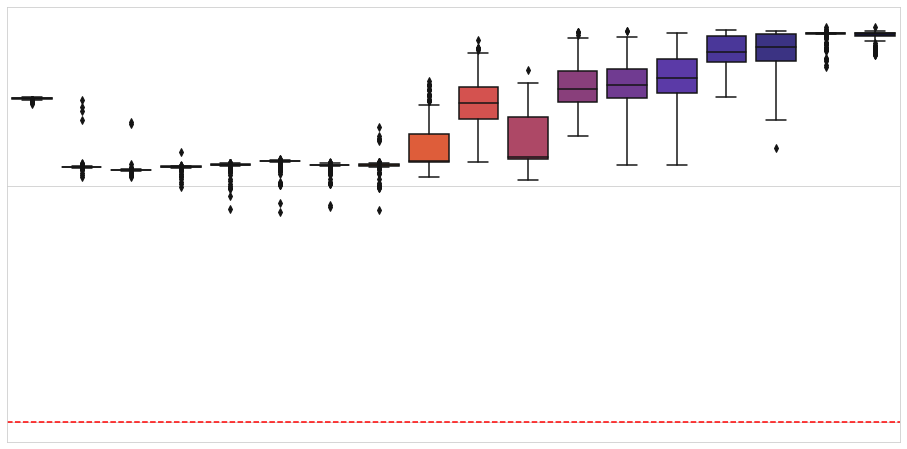

In [30]:
fig, ax1 = plt.subplots(1, figsize=(16,8))
sb.boxplot(data=lossesDF, palette='CMRmap_r', ax=ax1)
ax1.axhline(y=10e-4, color='r', linestyle='--')
#ax1.set_title('Losses of networks after pruning', fontsize=20)
#ax1.set_xlabel("Sparsity of network", fontsize=18)
#ax1.set_ylabel("Mean-squared error", fontsize=18)
ax1.set_yscale('log')
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelleft=False)         # ticks along the top edge are off

In [31]:
lossesDF['25%'].median()

0.011714601423591375

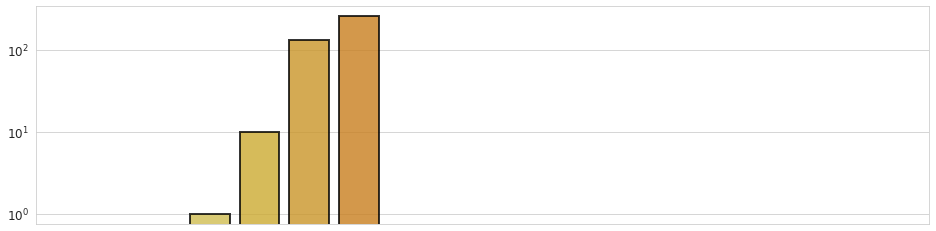

In [16]:
sb.set_style("whitegrid")
fig, ax1 = plt.subplots(1, figsize=(16,4))
sb.barplot(np.arange(18), counts, palette='CMRmap_r', alpha = 0.8, linewidth=2, edgecolor=".01")
plt.yscale('log')
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    labelsize=12,
    labelleft=True)   


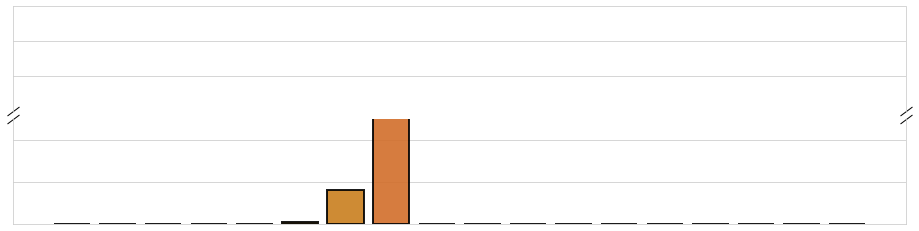

In [17]:
sb.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (16,4))
fig.subplots_adjust(hspace=0.08)

#clrs = ['grey' if (x < max(counts)) else '#2b7bba' for x in counts]

sb.barplot(np.arange(18), counts, palette='CMRmap_r', ax=ax1, alpha = 0.9, linewidth=2, edgecolor=".01")
sb.barplot(np.arange(18), counts, palette='CMRmap_r', ax=ax2, alpha = 0.9, linewidth=2, edgecolor=".01")

ax1.set_ylim(800, 860)  # outliers only
ax2.set_ylim(0, 250) 

# hide the spines between ax and ax2
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#ax1.spines['right'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    labelsize=12,
    labelleft=False)         # ticks along the top edge are off

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    labelsize=12,
    labelleft=False)         # ticks along the top edge are off

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)         # ticks along the top edge are off

ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#ax2.xaxis.tick_bottom()

d = .75  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

#ax1.set_xlim([5,15])
#plt.xticks([6,7,8,9,10,11,12,13,14],['65%','75%','85%','90%','91%','92%','93%','94%','95%'], fontsize=12)
#ax1.set_title('Number sparse networks below pruning threshold', fontsize=20)
#fig.text(0.06, 0.5, 'Number of networks', fontsize=18, ha='center', va='center', rotation='vertical')
#fig.text(0.5, 0.04, "Sparsity of network", fontsize=18, ha='center', va='center')

In [18]:
numTotal6 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 6:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal6.append(netTotal)

numTotal6DF = pd.DataFrame(numTotal6, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [19]:
numTotal7 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 7:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal7.append(netTotal)

numTotal7DF = pd.DataFrame(numTotal7, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [24]:
numTotal8 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 8:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal8.append(netTotal)

numTotal8DF = pd.DataFrame(numTotal8, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [25]:
numTotal9 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 9:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal9.append(netTotal)

numTotal9DF = pd.DataFrame(numTotal9, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [26]:
numTotal10 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 10:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal10.append(netTotal)     

numTotal10DF = pd.DataFrame(numTotal10, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [27]:
numTotal11 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 11:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal11.append(netTotal)
        
numTotal11DF = pd.DataFrame(numTotal11, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [28]:
numTotal12 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 12:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal12.append(netTotal)

numTotal12DF = pd.DataFrame(numTotal12, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
        
numTotal12DF['layer 1'] = numTotal12DF['layer 1']/(10*400)
numTotal12DF['layer 2'] = numTotal12DF['layer 2']/(400*400)
numTotal12DF['layer 3'] = numTotal12DF['layer 3']/(400*400)
numTotal12DF['layer 4'] = numTotal12DF['layer 4']/(400*16)
numTotal12DF['layer 5'] = numTotal12DF['layer 5']/(16*7)

In [29]:
numTotal13 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 13:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal13.append(netTotal)

numTotal13DF = pd.DataFrame(numTotal13, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [29]:
numTotal14 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 14:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal14.append(netTotal)

numTotal14DF = pd.DataFrame(numTotal14, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

Text(0.5, 0, 'Percent of nonzero weights')

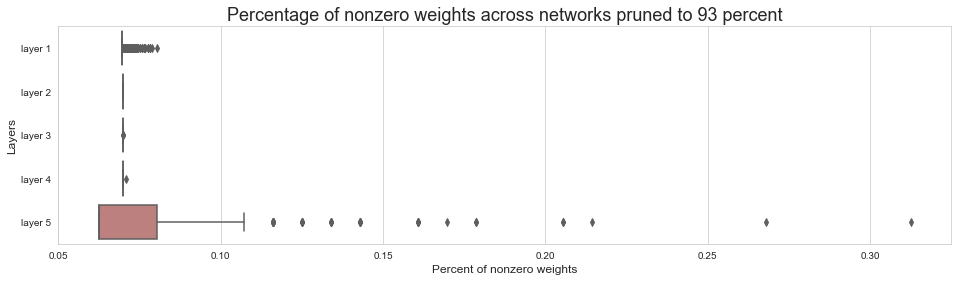

In [30]:
fig, ax1 = plt.subplots(1, figsize = (16,4))
sb.boxplot(data=numTotal12DF, orient='h', palette="vlag")
#sb.stripplot(data=numTotal12DF, orient='h', size=4, color=".3", linewidth=0)
ax1.set_title('Percentage of nonzero weights across networks pruned to 93 percent', fontsize=18)
ax1.set_ylabel("Layers", fontsize=12)
ax1.set_xlabel("Percent of nonzero weights", fontsize=12)

<AxesSubplot:xlabel='layer 5', ylabel='Count'>

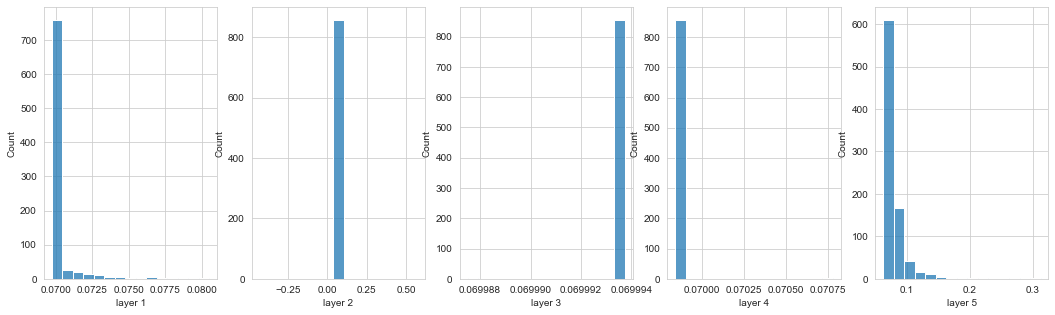

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=numTotal12DF['layer 1'], bins = 15)
sb.histplot(ax= ax2, data=numTotal12DF['layer 2'], bins = 15)
sb.histplot(ax= ax3, data=numTotal12DF['layer 3'], bins = 15)
sb.histplot(ax= ax4, data=numTotal12DF['layer 4'], bins = 15)
sb.histplot(ax= ax5, data=numTotal12DF['layer 5'], bins = 15)

In [32]:
numTotal12DF

layer 1   layer 2   layer 3   layer 4   layer 5
0    0.06975  0.069994  0.069994  0.069844  0.062500
1    0.07075  0.069994  0.069994  0.069844  0.089286
2    0.06975  0.069994  0.069994  0.069844  0.080357
3    0.06975  0.069994  0.069994  0.069844  0.062500
4    0.06975  0.069994  0.069994  0.069844  0.062500
..       ...       ...       ...       ...       ...
853  0.06975  0.069994  0.069994  0.069844  0.062500
854  0.06975  0.069994  0.069994  0.069844  0.062500
855  0.07000  0.069994  0.069994  0.069844  0.062500
856  0.06975  0.069994  0.069994  0.069844  0.062500
857  0.07000  0.069994  0.069994  0.069844  0.062500

[858 rows x 5 columns]

In [33]:
print(np.mean(numTotal12DF['layer 1']))
print(np.mean(numTotal12DF['layer 2']))
print(np.mean(numTotal12DF['layer 3']))
print(np.mean(numTotal12DF['layer 4']))
print(np.mean(numTotal12DF['layer 5']))

print(np.std(numTotal12DF['layer 1']))
print(np.std(numTotal12DF['layer 2']))
print(np.std(numTotal12DF['layer 3']))
print(np.std(numTotal12DF['layer 4']))
print(np.std(numTotal12DF['layer 5']))


0.07009877622377575
0.06999375000000042
0.06999372814685358
0.06984484265734141
0.07401973026973035
0.001194058823676505
4.3021142204224816e-16
3.689235798979949e-07
3.19870654901765e-05
0.021803936731780754


In [34]:
print(np.mean(numTotal12DF['layer 1']))
print(np.mean(numTotal12DF['layer 2']))
print(np.mean(numTotal12DF['layer 3']))
print(np.mean(numTotal12DF['layer 4']))
print(np.mean(numTotal12DF['layer 5']))

0.07009877622377575
0.06999375000000042
0.06999372814685358
0.06984484265734141
0.07401973026973035


In [35]:
print(np.var(numTotal12DF['layer 1']))
print(np.var(numTotal12DF['layer 2']))
print(np.var(numTotal12DF['layer 3']))
print(np.var(numTotal12DF['layer 4']))
print(np.var(numTotal12DF['layer 5']))

1.425776474399719e-06
1.8508186765561337e-31
1.3610460780475223e-13
1.0231723586728403e-09
0.00047541165700349796


In [36]:
#Conclusions so far 
#When comparing number of nonzero weights, there is a network stucture that seems to arise 

#need to compare the acutal value of the weights, maybe z test to compare distributions? 
#z test won't capture connectivity 

#prune only inner layers after 93 percent pruned 
#movie of network weight distributions 
#compared layer weight distributions 

In [37]:
sparseNets6 = [net[1] for net in sparseNets if net[0]==6]
sparseNets7 = [net[1] for net in sparseNets if net[0]==7]
sparseNets8 = [net[1] for net in sparseNets if net[0]==8]
sparseNets9 = [net[1] for net in sparseNets if net[0]==9]
sparseNets10 = [net[1] for net in sparseNets if net[0]==10]
sparseNets11 = [net[1] for net in sparseNets if net[0]==11]
sparseNets12 = [net[1] for net in sparseNets if net[0]==12]
sparseNets13 = [net[1] for net in sparseNets if net[0]==13]
sparseNets14 = [net[1] for net in sparseNets if net[0]==14]

In [38]:
sparseNets6 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets6]
sparseNets7 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets7]
sparseNets8 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets8]
sparseNets9 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets9]
sparseNets10 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets10]
sparseNets11 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets11]
sparseNets12 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets12]
sparseNets13 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets13]
sparseNets14 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets14]

In [39]:
sparseNets6DF = pd.DataFrame(sparseNets6, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets7DF = pd.DataFrame(sparseNets7, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets8DF = pd.DataFrame(sparseNets8, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets9DF = pd.DataFrame(sparseNets9, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets10DF = pd.DataFrame(sparseNets10, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets11DF = pd.DataFrame(sparseNets11, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets12DF = pd.DataFrame(sparseNets12, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets13DF = pd.DataFrame(sparseNets13, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets14DF = pd.DataFrame(sparseNets14, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

Text(0, 0.5, 'Number of weights')

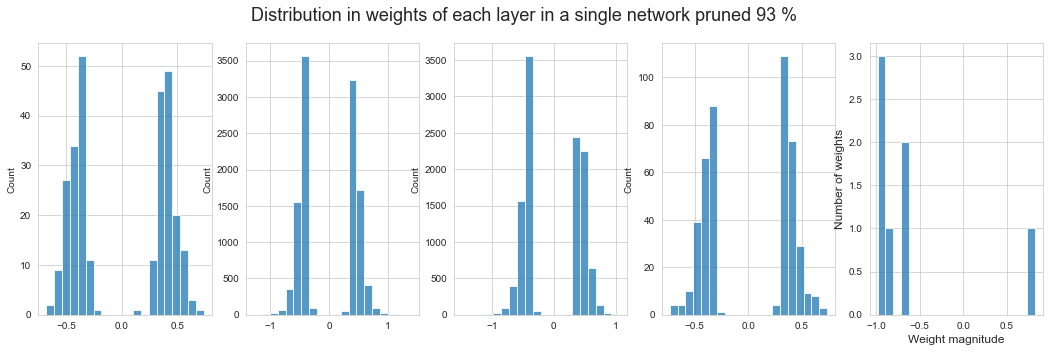

In [40]:
net1lay1 = sparseNets12DF['layer 1'][0].flatten()
net1lay2 = sparseNets12DF['layer 2'][0].flatten()
net1lay3 = sparseNets12DF['layer 3'][0].flatten()
net1lay4 = sparseNets12DF['layer 4'][0].flatten()
net1lay5 = sparseNets12DF['layer 5'][0].flatten()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (18,5))
sb.histplot(net1lay1[net1lay1 != 0], bins=20, ax=ax1)
sb.histplot(net1lay2[net1lay2 != 0], bins=20, ax=ax2)
sb.histplot(net1lay3[net1lay3 != 0], bins=20, ax=ax3)
sb.histplot(net1lay4[net1lay4 != 0], bins=20, ax=ax4)
sb.histplot(net1lay5[net1lay5 != 0], bins=20, ax=ax5)

fig.suptitle('Distribution in weights of each layer in a single network pruned 93 %', fontsize=18)
plt.xlabel("Weight magnitude", fontsize=12)
plt.ylabel("Number of weights", fontsize=12)

In [41]:
nonZeroFirstLayer6 = np.zeros((sparseNets6DF.shape[0],10))
nonZeroFirstLayer7 = np.zeros((sparseNets7DF.shape[0],10))
nonZeroFirstLayer8 = np.zeros((sparseNets8DF.shape[0],10))
nonZeroFirstLayer9 = np.zeros((sparseNets9DF.shape[0],10))
nonZeroFirstLayer10 = np.zeros((sparseNets10DF.shape[0],10))
nonZeroFirstLayer11 = np.zeros((sparseNets11DF.shape[0],10))
nonZeroFirstLayer12 = np.zeros((sparseNets12DF.shape[0],10))
nonZeroFirstLayer13 = np.zeros((sparseNets13DF.shape[0],10))
nonZeroFirstLayer14 = np.zeros((sparseNets14DF.shape[0],10))

for i in range(len(sparseNets6DF['layer 1'])):
    nonZeroFirstLayer6[i] = np.count_nonzero(sparseNets6DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets7DF['layer 1'])):
    nonZeroFirstLayer7[i] = np.count_nonzero(sparseNets7DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets8DF['layer 1'])):
    nonZeroFirstLayer8[i] = np.count_nonzero(sparseNets8DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets9DF['layer 1'])):
    nonZeroFirstLayer9[i] = np.count_nonzero(sparseNets9DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets10DF['layer 1'])):
    nonZeroFirstLayer10[i] = np.count_nonzero(sparseNets10DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets11DF['layer 1'])):
    nonZeroFirstLayer11[i] = np.count_nonzero(sparseNets11DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets12DF['layer 1'])):
    nonZeroFirstLayer12[i] = np.count_nonzero(sparseNets12DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets13DF['layer 1'])):
    nonZeroFirstLayer13[i] = np.count_nonzero(sparseNets13DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets14DF['layer 1'])):
    nonZeroFirstLayer14[i] = np.count_nonzero(sparseNets14DF['layer 1'][i], axis=1)
    

In [42]:
nonZeroFirstLayer6DF = pd.DataFrame(nonZeroFirstLayer6, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer7DF = pd.DataFrame(nonZeroFirstLayer7, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer8DF = pd.DataFrame(nonZeroFirstLayer8, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer9DF = pd.DataFrame(nonZeroFirstLayer9, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer10DF = pd.DataFrame(nonZeroFirstLayer10, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer11DF = pd.DataFrame(nonZeroFirstLayer11, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer12DF = pd.DataFrame(nonZeroFirstLayer12, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer13DF = pd.DataFrame(nonZeroFirstLayer13, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer14DF = pd.DataFrame(nonZeroFirstLayer14, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])

In [43]:
nonZeroFirstLayer12DF

phi_0  theta_0  x_99  y_99  phi_99  theta_99  x_dot_0  y_dot_0  \
0     23.0     32.0  23.0  21.0    69.0      70.0     20.0     21.0   
1     25.0     29.0  16.0  37.0    55.0      68.0     17.0     35.0   
2     23.0     30.0  29.0  18.0    67.0      71.0     26.0     15.0   
3     27.0     39.0  24.0  19.0    63.0      71.0     19.0     16.0   
4     19.0     31.0  21.0  28.0    66.0      71.0     19.0     23.0   
..     ...      ...   ...   ...     ...       ...      ...      ...   
853   24.0     34.0  26.0  21.0    67.0      69.0     18.0     20.0   
854   25.0     34.0  23.0  19.0    68.0      66.0     22.0     21.0   
855   25.0     36.0  23.0  20.0    71.0      64.0     20.0     21.0   
856   32.0     29.0  20.0  25.0    62.0      71.0     19.0     21.0   
857   24.0     36.0  20.0  25.0    66.0      68.0     20.0     21.0   

     phi_dot_0  theta_dot_0  
0          0.0          0.0  
1          1.0          0.0  
2          0.0          0.0  
3          1.0          0.0  
4          1.0          0.0  
..         ...          ...  
853        0.0          0.0  
854        1.0          0.0  
855        0.0          0.0  
856        0.0          0.0  
857        0.0          0.0  

[858 rows x 10 columns]

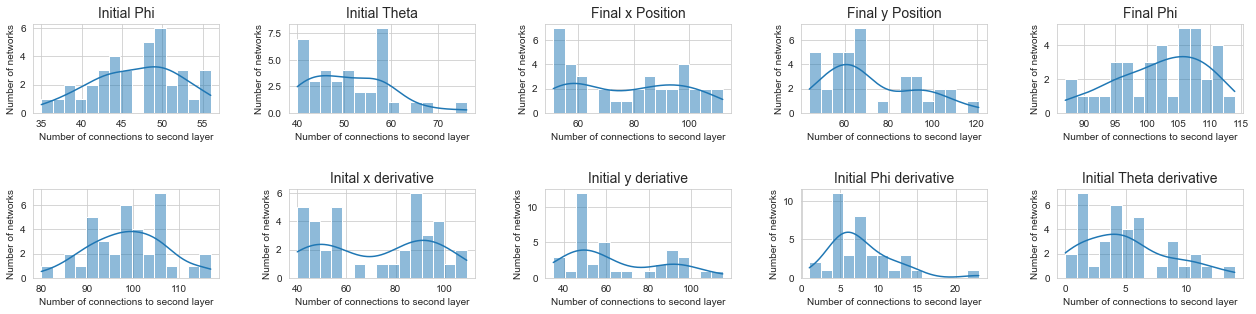

In [44]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer8DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer8DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer8DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer8DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer8DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer8DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer8DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer8DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer8DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer8DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


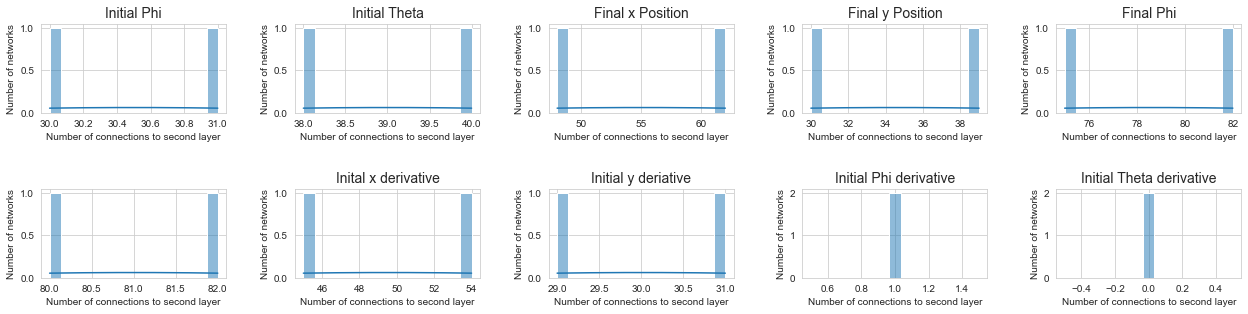

In [45]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer9DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer9DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer9DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer9DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer9DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer9DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer9DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer9DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer9DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer9DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

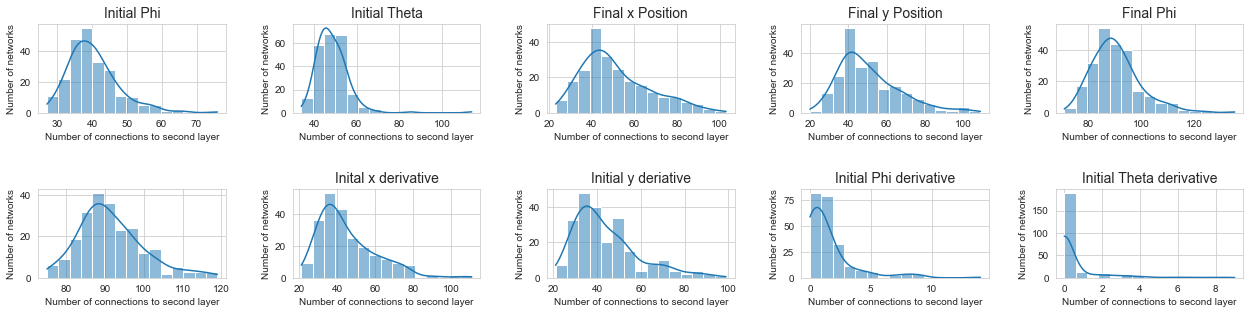

In [46]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer10DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer10DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer10DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer10DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer10DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer10DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer10DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer10DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer10DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer10DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


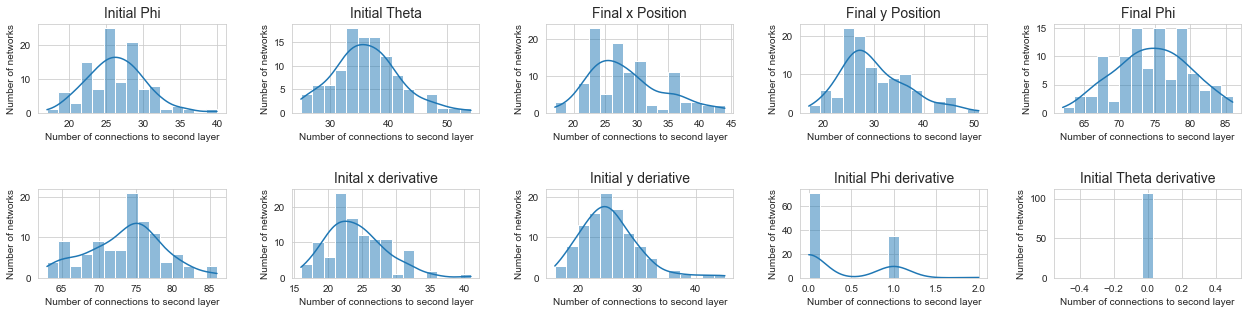

In [47]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer11DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer11DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer11DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer11DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer11DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer11DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer11DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer11DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer11DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer11DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

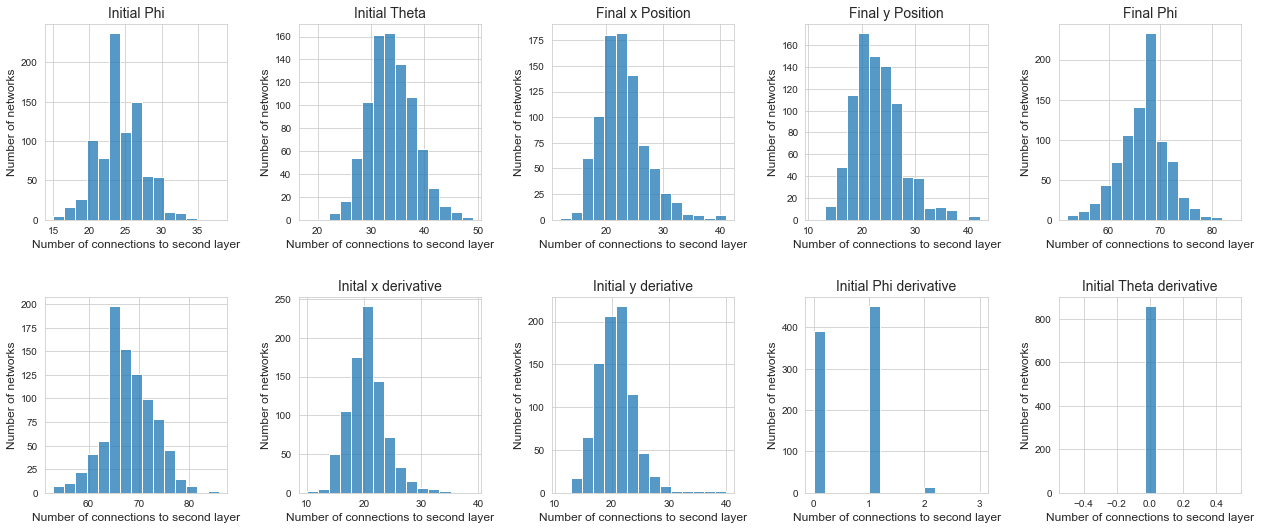

In [48]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,8))
sb.histplot(ax= ax1, data=nonZeroFirstLayer12DF["phi_0"], bins = 15)
ax1.set_xlabel("Number of connections to second layer", fontsize=12)
ax1.set_ylabel("Number of networks", fontsize=12)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer12DF["theta_0"], bins = 15)
ax2.set_xlabel("Number of connections to second layer", fontsize=12)
ax2.set_ylabel("Number of networks", fontsize=12)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer12DF["x_99"], bins = 15)
ax3.set_xlabel("Number of connections to second layer", fontsize=12)
ax3.set_ylabel("Number of networks", fontsize=12)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer12DF["y_99"], bins = 15)
ax4.set_xlabel("Number of connections to second layer", fontsize=12)
ax4.set_ylabel("Number of networks", fontsize=12)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer12DF["phi_99"], bins = 15)
ax5.set_xlabel("Number of connections to second layer", fontsize=12)
ax5.set_ylabel("Number of networks", fontsize=12)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer12DF["theta_99"], bins = 15)
ax6.set_xlabel("Number of connections to second layer", fontsize=12)
ax6.set_ylabel("Number of networks", fontsize=12)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer12DF["x_dot_0"], bins = 15)
ax7.set_xlabel("Number of connections to second layer", fontsize=12)
ax7.set_ylabel("Number of networks", fontsize=12)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer12DF["y_dot_0"], bins = 15)
ax8.set_xlabel("Number of connections to second layer", fontsize=12)
ax8.set_ylabel("Number of networks", fontsize=12)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer12DF["phi_dot_0"], bins = 15)
ax9.set_xlabel("Number of connections to second layer", fontsize=12)
ax9.set_ylabel("Number of networks", fontsize=12)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer12DF["theta_dot_0"], bins = 15)
ax10.set_xlabel("Number of connections to second layer", fontsize=12)
ax10.set_ylabel("Number of networks", fontsize=12)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

In [49]:
percentnonZeroFirstLayer12DF = nonZeroFirstLayer12DF/400*100

In [50]:
percentnonZeroFirstLayer12DF

phi_0  theta_0  x_99  y_99  phi_99  theta_99  x_dot_0  y_dot_0  \
0     5.75     8.00  5.75  5.25   17.25     17.50     5.00     5.25   
1     6.25     7.25  4.00  9.25   13.75     17.00     4.25     8.75   
2     5.75     7.50  7.25  4.50   16.75     17.75     6.50     3.75   
3     6.75     9.75  6.00  4.75   15.75     17.75     4.75     4.00   
4     4.75     7.75  5.25  7.00   16.50     17.75     4.75     5.75   
..     ...      ...   ...   ...     ...       ...      ...      ...   
853   6.00     8.50  6.50  5.25   16.75     17.25     4.50     5.00   
854   6.25     8.50  5.75  4.75   17.00     16.50     5.50     5.25   
855   6.25     9.00  5.75  5.00   17.75     16.00     5.00     5.25   
856   8.00     7.25  5.00  6.25   15.50     17.75     4.75     5.25   
857   6.00     9.00  5.00  6.25   16.50     17.00     5.00     5.25   

     phi_dot_0  theta_dot_0  
0         0.00          0.0  
1         0.25          0.0  
2         0.00          0.0  
3         0.25          0.0  
4         0.25          0.0  
..         ...          ...  
853       0.00          0.0  
854       0.25          0.0  
855       0.00          0.0  
856       0.00          0.0  
857       0.00          0.0  

[858 rows x 10 columns]

In [51]:
cols = percentnonZeroFirstLayer12DF.columns.tolist()
cols

['phi_0',
 'theta_0',
 'x_99',
 'y_99',
 'phi_99',
 'theta_99',
 'x_dot_0',
 'y_dot_0',
 'phi_dot_0',
 'theta_dot_0']

In [52]:
cols = ['phi_0','theta_0','x_dot_0','y_dot_0','phi_dot_0','theta_dot_0','x_99','y_99','phi_99','theta_99']
percentnonZeroFirstLayer12DF = percentnonZeroFirstLayer12DF[cols]
percentnonZeroFirstLayer12DF

phi_0  theta_0  x_dot_0  y_dot_0  phi_dot_0  theta_dot_0  x_99  y_99  \
0     5.75     8.00     5.00     5.25       0.00          0.0  5.75  5.25   
1     6.25     7.25     4.25     8.75       0.25          0.0  4.00  9.25   
2     5.75     7.50     6.50     3.75       0.00          0.0  7.25  4.50   
3     6.75     9.75     4.75     4.00       0.25          0.0  6.00  4.75   
4     4.75     7.75     4.75     5.75       0.25          0.0  5.25  7.00   
..     ...      ...      ...      ...        ...          ...   ...   ...   
853   6.00     8.50     4.50     5.00       0.00          0.0  6.50  5.25   
854   6.25     8.50     5.50     5.25       0.25          0.0  5.75  4.75   
855   6.25     9.00     5.00     5.25       0.00          0.0  5.75  5.00   
856   8.00     7.25     4.75     5.25       0.00          0.0  5.00  6.25   
857   6.00     9.00     5.00     5.25       0.00          0.0  5.00  6.25   

     phi_99  theta_99  
0     17.25     17.50  
1     13.75     17.00  
2     16.75     17.75  
3     15.75     17.75  
4     16.50     17.75  
..      ...       ...  
853   16.75     17.25  
854   17.00     16.50  
855   17.75     16.00  
856   15.50     17.75  
857   16.50     17.00  

[858 rows x 10 columns]

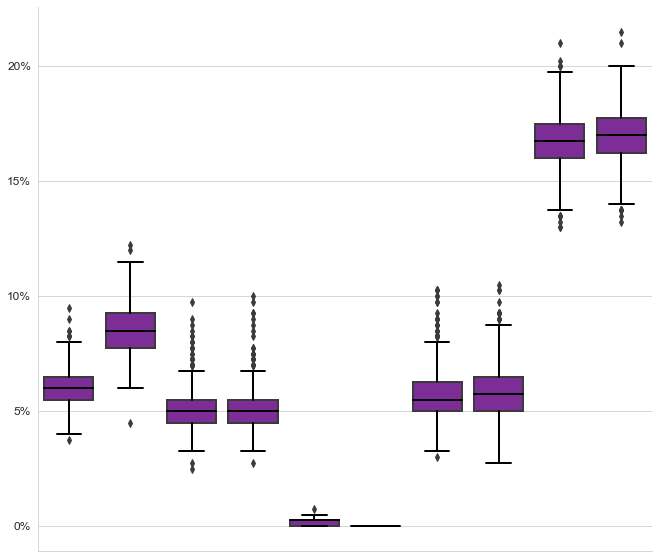

In [58]:
fig, ax1 = plt.subplots(1, figsize = (11,10))
sb.boxplot(data=percentnonZeroFirstLayer12DF, color='#7D2E96', saturation=3, linewidth=2)
plt.yticks([0,5,10,15,20],['0%','5%','10%','15%','20%'], fontsize=12)
ax1.axes.xaxis.set_ticklabels([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for line in ax1.get_lines():
    line.set_color('black')


In [ ]:
nonZeroLastLayer = np.zeros((852,7))

for i in range(len(sparseNets12DF['layer 5'])):
    nonZeroLastLayer[i] = np.count_nonzero(sparseNets12DF['layer 5'][i], axis=0)

In [ ]:
nonZeroLastLayer

In [ ]:
nonZeroLastLayerDF = pd.DataFrame(nonZeroLastLayer, columns=["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"])

In [ ]:
nonZeroLastLayerDF

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroLastLayerDF["Fx"], bins = 20)
sb.histplot(ax= ax2, data=nonZeroLastLayerDF["Fy"], bins = 20)
sb.histplot(ax= ax3, data=nonZeroLastLayerDF["tau"], bins = 20)
sb.histplot(ax= ax4, data=nonZeroLastLayerDF["x_dot_99"], bins = 20)
sb.histplot(ax= ax5, data=nonZeroLastLayerDF["y_dot_99"], bins = 20)
sb.histplot(ax= ax6, data=nonZeroLastLayerDF["phi_dot_99"], bins = 20)
sb.histplot(ax= ax7, data=nonZeroLastLayerDF["theta_dot_99"], bins = 20)

fig.tight_layout(pad=3.0)

NameError: name 'epochlossesFIG' is not defined

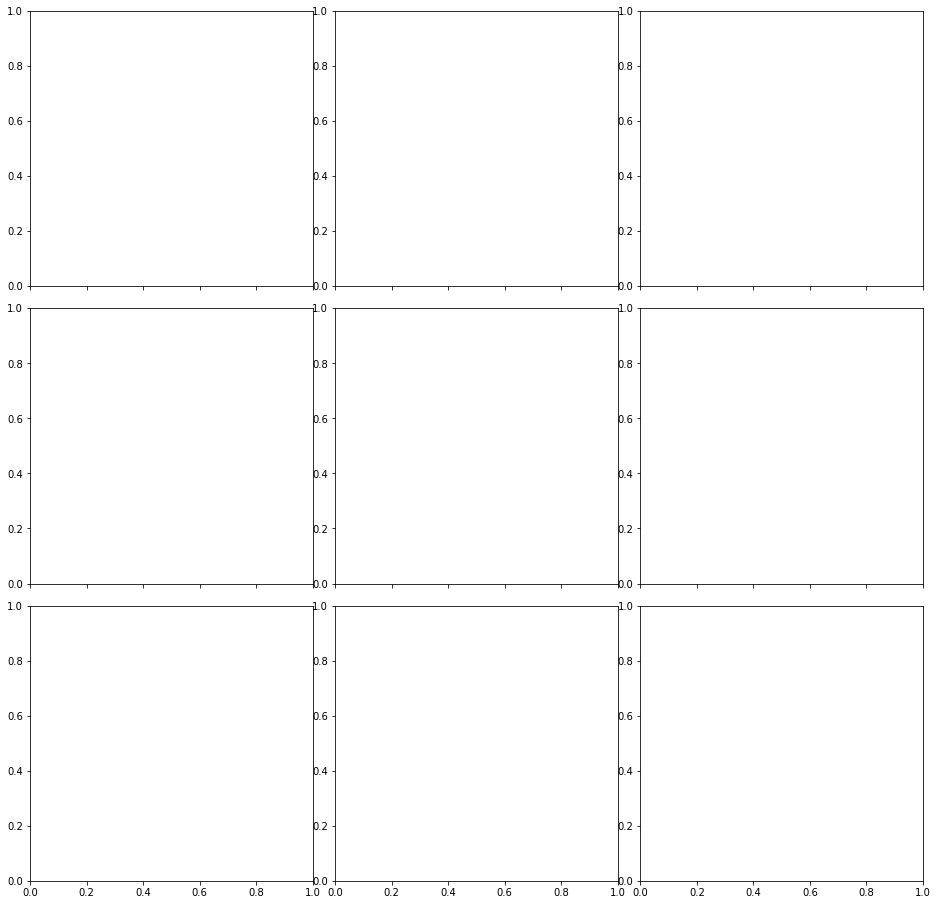

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(16,16), sharex=True)
fig.subplots_adjust(hspace=0.08, wspace=0.08)

ax1.plot(epochlossesFIG[:,9], color='#2b2688', alpha = 0.6, linewidth=.4)
ax1.set_yscale('log')
ax1.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax1.set_xlim(0,70400)
ax1.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax1.plot(60598, .15, 'v', color='black')
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax2.plot(epochlossesFIG[:,1], color='#2b2688', alpha = 0.6, linewidth=.4)
ax2.set_yscale('log')
ax2.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax2.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax2.plot(60598, .12, 'v', color='black')
ax2.set_xlim(0,70400)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax3.plot(epochlossesFIG[:,2], color='#2b2688', alpha = 0.6, linewidth=.4)
ax3.set_yscale('log')
ax3.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax3.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax3.plot(60598, .11, 'v', color='black')
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',    # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax4.plot(epochlossesFIG[:,3], color='#2b2688', alpha = 0.6, linewidth=.4)
ax4.set_yscale('log')
ax4.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax4.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax4.plot(60598, .3, 'v', color='black')
ax4.set_xlim(0,70400)
ax4.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax4.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax5.plot(epochlossesFIG[:,4], color='#2b2688', alpha = 0.6, linewidth=.4)
ax5.set_yscale('log')
ax5.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax5.axvline(x=57999, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax5.plot(57998, .3, 'v', color='black')
ax5.set_xlim(0,70400)
ax5.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax5.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax6.plot(epochlossesFIG[:,5], color='#2b2688', alpha = 0.6, linewidth=.4)
ax6.set_yscale('log')
ax6.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax6.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax6.plot(60598, .3, 'v', color='black')
ax6.set_xlim(0,70400)
ax6.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax6.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax7.plot(epochlossesFIG[:,6], color='#2b2688', alpha = 0.6, linewidth=.4)
ax7.set_yscale('log')
ax7.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax7.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax7.plot(60598, .24, 'v', color='black')
ax7.set_xlim(0,70400)
ax7.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=True,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

ax7.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',   # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=True) 

ax8.plot(epochlossesFIG[:,7], color='#2b2688', alpha = 0.6, linewidth=.4)
ax8.set_yscale('log')
ax8.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax8.axvline(x=64999, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax8.plot(64998, .3, 'v', color='black')
ax8.set_xlim(0,70400)
ax8.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax8.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax9.plot(epochlossesFIG[:,8], color='#2b2688', alpha = 0.6, linewidth=.4)
ax9.set_yscale('log')
ax9.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax9.axvline(x=64999, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax9.plot(64998, .3, 'v', color='black')
ax9.set_xlim(0,70400)
ax9.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax9.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 